In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/Users/afyqeyzar/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
blue_wavelength, blue_intensity = np.loadtxt('blue_filter.txt', delimiter=',', unpack = True)
green_wavelength, green_intensity = np.loadtxt('green_filter.txt', delimiter=',', unpack = True)
red_wavelength, red_intensity = np.loadtxt('red_filter.txt', delimiter=',', unpack = True)
UV_wavelength, UV_intensity = np.loadtxt('UV_filter.txt', delimiter=',', unpack = True)
violet_wavelength, violet_intensity = np.loadtxt('violet_filter.txt', delimiter=',', unpack = True)
yellow_wavelength, yellow_intensity = np.loadtxt('yellow_filter.txt', delimiter=',', unpack = True)

In [3]:
def gauss(x, A, x0, sigma):
  return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [38]:
def get_fit(wavelength, intensity, initial_guess = [0.004, 425, 10], color ='blue',limits = [400,470]):
  fit, cov = curve_fit(gauss, wavelength, intensity , p0=initial_guess, absolute_sigma=True)
  #print(fit)
  plt.plot(wavelength,intensity,color = color)
  plt.plot(wavelength,gauss(wavelength,fit[0],fit[1],fit[2]),'black')
  plt.xlim(limits[0],limits[1])
  plt.title('mean = ' + str(fit[1]) +  ' sigma = ' + str(fit[2]))
  return fit[1], fit[2]

(435.0114454429578, 3.7108737827078215)

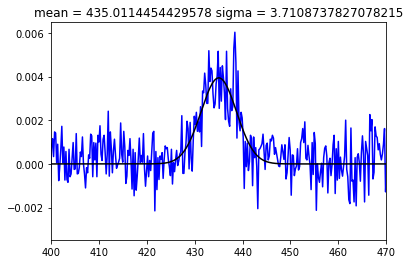

In [39]:
get_fit(blue_wavelength,blue_intensity)

(547.2771072367408, 3.4092042511845286)

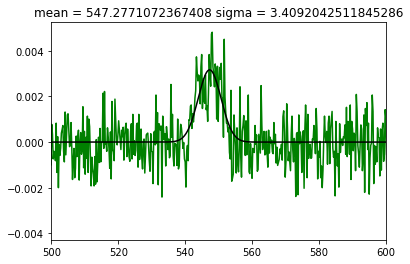

In [40]:
get_fit(green_wavelength,green_intensity,initial_guess=[0.004, 540, 10],color='green',limits=[500,600])

(691.0245403905677, -3.553687463019644)

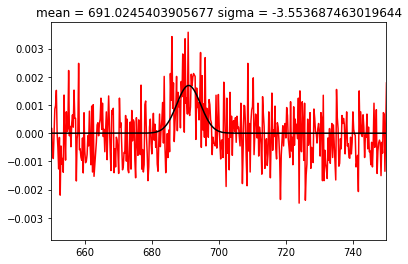

In [41]:
get_fit(red_wavelength,red_intensity,initial_guess=[0.004, 680, 10],color='red',limits=[650,750])

(364.65320422751313, 3.617734691402427)

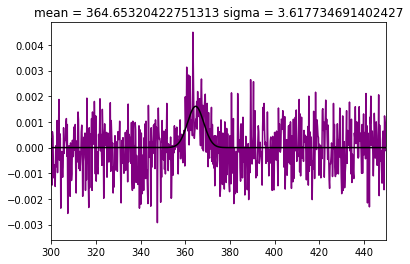

In [42]:
get_fit(UV_wavelength,UV_intensity,initial_guess=[0.004, 360, 10],color='purple',limits=[300,450])

(405.44984078680034, 3.2986506282621866)

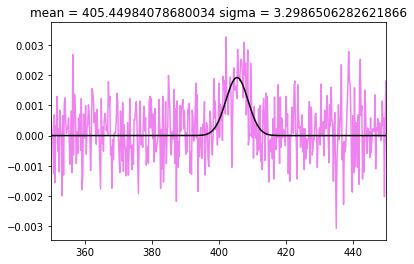

In [43]:
get_fit(violet_wavelength,violet_intensity,initial_guess=[0.004, 400, 10],color='violet',limits=[350,450])

(578.5965622688572, 3.4880173958722787)

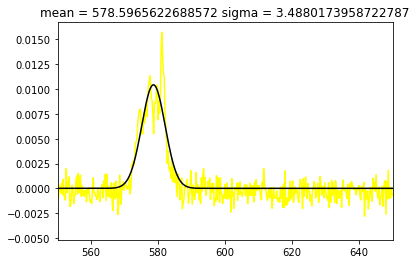

In [44]:
get_fit(yellow_wavelength,yellow_intensity,initial_guess=[0.004, 580, 10],color='yellow',limits=[550,650])